In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('customer_booking.csv', encoding='latin1')

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [ ]:
#describes which column is numerical and categorical.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Feature Engineering for flight_day column.

It tells about the flight, if the flight_day value is 1, it means the flight is going for a weekend or leisure travels.

If the flight_day value is 0, it means flight is going for a work day or business work.

In [ ]:
# 1. Define the rules (bins)
# Format: [Start, Limit1, Limit2, End]
# bins = [0, 5, 10, 100] means:
#   0-5   = Short
#   5-10  = Medium
#   10+   = Long
bins = [0, 5, 10, 100]
labels = ['Short', 'Medium', 'Long']

# 2. Create the Category Column
df['Duration_Category'] = pd.cut(df['flight_duration'], bins=bins, labels=labels)

# 3. Encode it immediately (Ordinal Encoding)
# Because Short < Medium < Long, we map them to 1, 2, 3
duration_mapping = {
    'Short': 1,
    'Medium': 2,
    'Long': 3
}

df['Duration_Category'] = df['Duration_Category'].map(duration_mapping)

# Check the result
print(df[['flight_duration', 'Duration_Category']].head())

   flight_duration Duration_Category
0             5.52                 2
1             5.52                 2
2             5.52                 2
3             5.52                 2
4             5.52                 2


In [ ]:
# Create a simple mapping
mapping = {
    "Mon": 0, "Tue": 0, "Wed": 0, "Thu": 0, "Fri": 0,
    "Sat": 1, "Sun": 1
}

# Create a new column 'is_weekend'
df['is_weekend'] = df['flight_day'].map(mapping)

In [ ]:
# Define a custom dictionary
day_mapping = {
    "Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7
}

# Apply the mapping
df['flight_day'] = df['flight_day'].map(day_mapping)

Encode Categorical Columns

In [ ]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sales_channel'] = le.fit_transform(df['sales_channel'])
df['route'] = le.fit_transform(df['route'])
df['booking_origin'] = le.fit_transform(df['booking_origin'])

In [ ]:
df = pd.get_dummies(df, columns=['trip_type'], drop_first=True, dtype=int)

In [ ]:
x = df.drop(columns=['booking_complete'])
y = df['booking_complete']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [ ]:
df.head(10)

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Duration_Category,is_weekend,trip_type_OneWay,trip_type_RoundTrip
0,2,0,262,19,7,6,0,61,1,0,0,5.52,0,2,1,0,1
1,1,0,112,20,3,6,0,61,0,0,0,5.52,0,2,1,0,1
2,2,0,243,22,17,3,0,36,1,1,0,5.52,0,2,0,0,1
3,1,0,96,31,4,6,0,61,0,0,1,5.52,0,2,1,0,1
4,2,0,68,22,15,3,0,36,1,0,1,5.52,0,2,0,0,1
5,1,0,3,48,20,4,0,61,1,0,1,5.52,0,2,0,0,1
6,3,0,201,33,6,4,0,61,1,0,1,5.52,0,2,0,0,1
7,2,0,238,19,14,1,0,36,1,0,1,5.52,0,2,0,0,1
8,1,0,80,22,4,1,0,61,0,0,1,5.52,0,2,0,0,1
9,1,1,378,30,12,7,0,36,0,0,0,5.52,0,2,1,0,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')

classifier.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

report = classification_report(y_test, y_pred)
print(report)

0.8554
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.10      0.17      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.54      0.54     10000
weighted avg       0.82      0.86      0.81     10000



In [ ]:
# 1. Install imbalanced-learn (only needed once in Colab)
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 2. Resample the training data (Make the "Yes" class bigger)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# 3. Train a NEW model on this balanced data
# We give it a new name 'rf_smote' to avoid confusion
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(x_train_resampled, y_train_resampled)

# 4. Evaluate the NEW model
y_pred_smote = rf_smote.predict(x_test)

print("--- NEW MODEL PERFORMANCE (With SMOTE) ---")
print(classification_report(y_test, y_pred_smote))

--- NEW MODEL PERFORMANCE (With SMOTE) ---
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      8520
           1       0.36      0.35      0.36      1480

    accuracy                           0.81     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.81      0.81      0.81     10000



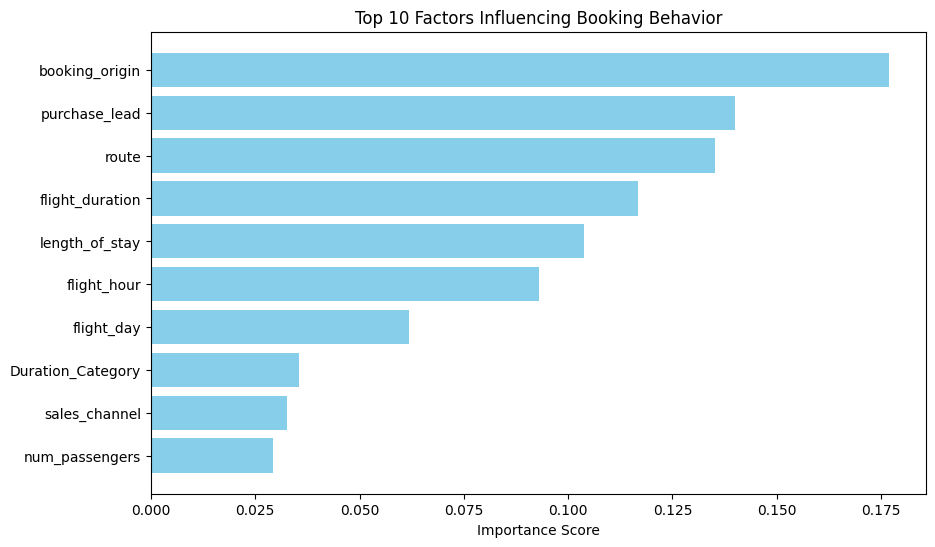

In [ ]:
import matplotlib.pyplot as plt

# 1. Get feature importance from the SMOTE model
importances = rf_smote.feature_importances_

# 2. Get the column names (features)
# We recreate the columns list from x_train to be safe
feature_names = pd.DataFrame(x_train).columns

# 3. Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Plot the Top 10 Features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title("Top 10 Factors Influencing Booking Behavior")
plt.xlabel("Importance Score")
plt.show()

if asked in an interview.
“Why are you interested in this role?”

I recently participated in the British Airways job simulation on the Forage
platform, and it was incredibly useful to understand what it might be like to
participate on a Data Science team at British Airways.
I worked on a project where I analysed customer insights and built a predictive
model to understand factors that influence buying behaviour. I practised my data
analytics skills using a Jupyter Notebook and built my PowerPoint and
communication skills by presenting insights in a real-world context.
Doing this programme confirmed that I really enjoy working with data to provide
business insights, and I'm excited to apply these skills to a Data Science team
at a company like British Airways.